<a href="https://colab.research.google.com/github/xparisax/random-problems/blob/master/sick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
folder = 'healthy'
file = 'healthy.txt'

In [0]:
folder  = 'patient'
file = 'patient.txt'

In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/"

base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path(base_dir + 'data/covid19')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [24]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/covid19/healthy'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/covid19/patient'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/covid19/patient.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/covid19/healthy.txt')]

In [0]:
classes = ['healthy','patient']

In [30]:
download_images(path/file, dest, max_pics=200)

In [27]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

healthy


patient


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [33]:
data.classes

['healthy', 'patient']

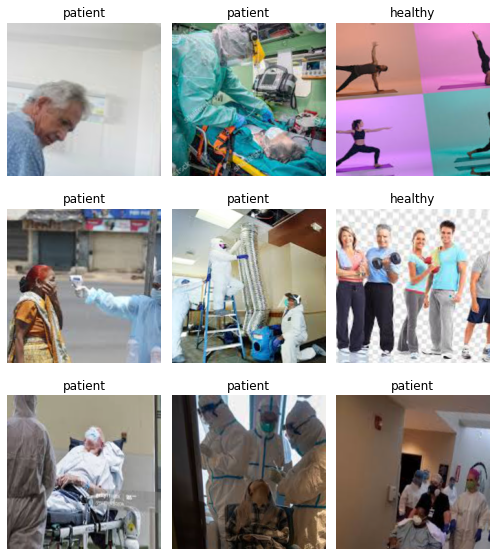

In [34]:
data.show_batch(rows=3, figsize=(7,8))

In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['healthy', 'patient'], 2, 164, 41)

In [35]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [37]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.072670,0.034494,0.024390,00:02
1,0.088415,0.066172,0.024390,00:02
2,0.092369,0.111355,0.024390,00:02
3,0.069527,0.150056,0.024390,00:02
4,0.059852,0.175722,0.024390,00:02
5,0.059217,0.189212,0.024390,00:02
6,0.049775,0.192588,0.024390,00:02
7,0.045073,0.198460,0.024390,00:02


In [0]:
learn.save('stage_1')

In [0]:
learn.unfreeze()

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


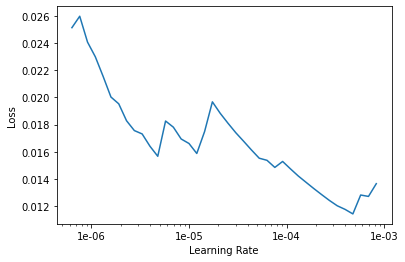

In [41]:
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


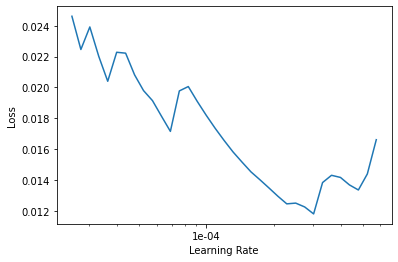

In [42]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.013227,0.225091,0.024390,00:02
1,0.008913,0.220503,0.024390,00:02
2,0.011173,0.173203,0.024390,00:02
3,0.016157,0.146437,0.024390,00:02


In [0]:
learn.save('stage_2')

In [0]:
learn.load('stage_2');

In [48]:
interp = ClassificationInterpretation.from_learner(learn)

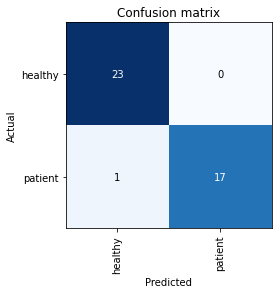

In [49]:
interp.plot_confusion_matrix()

In [51]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [0]:
defaults.device = torch.device('cpu')

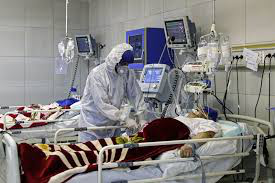

In [58]:
img = open_image(path/'index.jpg')
img

In [0]:
learn= load_learner(path)

In [64]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category tensor(1)